# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key, not working
#from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size is 20 to account for api limits
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
range_city = len(cities)
print(range_city)

618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
#Pulling info from the Weather API, setting request url
#url = 'http://api.openweathermap.org/data/2.5/weather?'

#parameter will be the cities list
city_param = {'units':'imperial','appid': 'dd48e7cdd6cf74e1585917a7462655a8'}


In [105]:
#weather list
cit_n = []
cloud = []
country = []
lat = []
lon = []
date = []
humid = []
temp = []
wind = []

In [106]:
#Run iteration to parse through each city in cities list

print('---'*15 + '\nBeginning Data Retrieval\n' + '---'*15)

for city in cities: #looping through the cities list
    try:
        get_city_weather = owm.get_current(city,**city_param)
        
#open weather variables... I know it's very convoluted.
        cn = get_city_weather['name']
        cit_n.append(cn)
        print(f"Processing record of {cn}")
        cloud.append(get_city_weather['clouds']['all'])
        country.append(get_city_weather['sys']['country'])
        lat.append(get_city_weather['coord']['lat'])
        lon.append(get_city_weather['coord']['lon'])
        date.append(get_city_weather['dt'])
        
#Getting the 'main' contents, because get_city_weather didn't work. If you're wondering.
        get_main = owm.get_current(city, **city_param)
        hum = get_main['main']['humidity']
        humid.append(hum)
        
        temp.append(get_main['main']['temp_max'])
           
        ws = get_main['wind']['speed']  
        wind.append(ws) 
    except:
        print("City not found...")
print("---"*15 + "\nData Retrieval Done\n" + "---"*15)


---------------------------------------------
Beginning Data Retrieval
---------------------------------------------
Processing record of Mataura
Processing record of Sao Gabriel da Cachoeira
Processing record of Saskylakh
Processing record of Barrow
City not found...
Processing record of Castro
Processing record of Albany
Processing record of Puerto Ayora
Processing record of Cape Town
Processing record of Takoradi
Processing record of Ushuaia
Processing record of Port Elizabeth
Processing record of Bethel
Processing record of Thaba Nchu
Processing record of Dikson
Processing record of Kindu
Processing record of Saint George
City not found...
Processing record of Duldurga
Processing record of Launceston
Processing record of Rikitea
Processing record of Bredasdorp
Processing record of Hopelchen
Processing record of Novoseleznevo
Processing record of Butaritari
City not found...
Processing record of Mehamn
Processing record of Kodiak
Processing record of Kruisfontein
Processing record o

Processing record of Moerai
Processing record of Kharp
City not found...
Processing record of Kisangani
City not found...
Processing record of Vaitape
Processing record of Prescott Valley
Processing record of Mattru
Processing record of Makinsk
Processing record of Sao Joao Evangelista
Processing record of Port-Cartier
Processing record of Huarmey
Processing record of Airai
Processing record of Bairnsdale
Processing record of Omboue
Processing record of Praia da Vitoria
Processing record of Moron
Processing record of Bambous Virieux
Processing record of Torbay
Processing record of Caohe
Processing record of Doha
Processing record of Shitanjing
Processing record of Merauke
Processing record of Dodge City
Processing record of Fort Nelson
Processing record of Vestmannaeyjar
Processing record of Acapulco
Processing record of Mayor Pablo Lagerenza
Processing record of San Policarpo
Processing record of Sur
Processing record of Galle
Processing record of Naron
Processing record of Nuuk
Proce

Processing record of Morondava
Processing record of Paengaroa
Processing record of Qixia
Processing record of Brae
Processing record of Puerto Ayacucho
City not found...
Processing record of Kodinsk
Processing record of Umm Kaddadah
Processing record of Newtonmore
Processing record of Heyang
Processing record of Naze
Processing record of Perelyub
Processing record of Qaqortoq
City not found...
Processing record of Vallenar
Processing record of Voskresenskoye
Processing record of Pingliang
Processing record of Christchurch
Processing record of Taksimo
Processing record of Turukhansk
Processing record of Rigaud
Processing record of Lorengau
Processing record of Tyukhtet
Processing record of Tsevie
City not found...
Processing record of Darhan
Processing record of Nelson Bay
Processing record of Evanston
Processing record of Qasigiannguit
Processing record of Richards Bay
Processing record of Ginda
Processing record of Daru
Processing record of College
Processing record of Arkhara
Process

In [107]:
#To verify api has appended everything into the lists
#again I know, very convoluted
print(len(cit_n))
print(len(cloud))
print(len(country))
print(len(lat)) 
print(len(lon))
print(len(date))
print(len(humid))
print(len(temp))
print(len(wind))

552
552
552
552
552
552
552
552
552


In [108]:
city_weather = {'City': cit_n,'Cloudiness': cloud,'Country':country,'Date':date,'Humidity':humid,'Lat':lat,
                'Lon': lon,'Max Temp':temp,'Wind Speed':wind}
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Mataura,99,NZ,1574470240,76,-46.19,168.86,60.01,5.99
1,Sao Gabriel da Cachoeira,72,BR,1574470241,96,-0.13,-67.09,74.55,3.44
2,Saskylakh,90,RU,1574470243,98,71.97,114.09,-9.76,3.76
3,Barrow,47,AR,1574470243,75,-38.31,-60.23,47.46,7.05
4,Castro,73,CL,1574470244,58,-42.48,-73.76,57.20,2.24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
#export file to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [127]:
#get current date with time module
current_day = time.strftime('%m/%d/%Y', time.localtime())

#read csv file
csv_df = pd.read_csv('output_data/cities.csv')

#deletes any 'Unnamed' columns, always run into this issue at work...
csv_df = csv_df.loc[:,~csv_df.columns.str.contains('^Unnamed')]

#read cleaned up file
csv_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Mataura,99,NZ,1574470240,76,-46.19,168.86,60.01,5.99
1,Sao Gabriel da Cachoeira,72,BR,1574470241,96,-0.13,-67.09,74.55,3.44
2,Saskylakh,90,RU,1574470243,98,71.97,114.09,-9.76,3.76
3,Barrow,47,AR,1574470243,75,-38.31,-60.23,47.46,7.05
4,Castro,73,CL,1574470244,58,-42.48,-73.76,57.20,2.24


#### Latitude vs. Temperature Plot

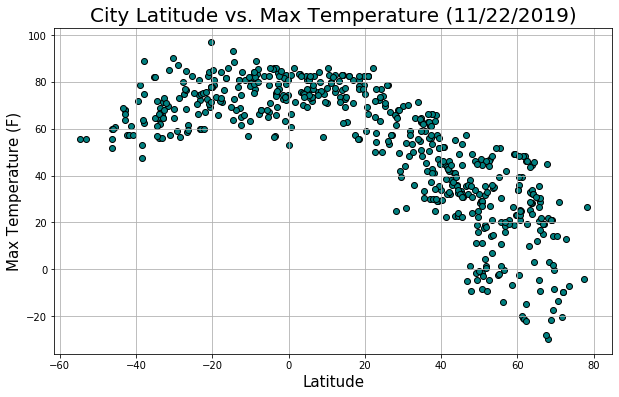

In [128]:
lat_temp = csv_df[['Lat','Max Temp']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Max Temp'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Max Temperature ({current_day})',size=20)
plt.ylabel('Max Temperature (F)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

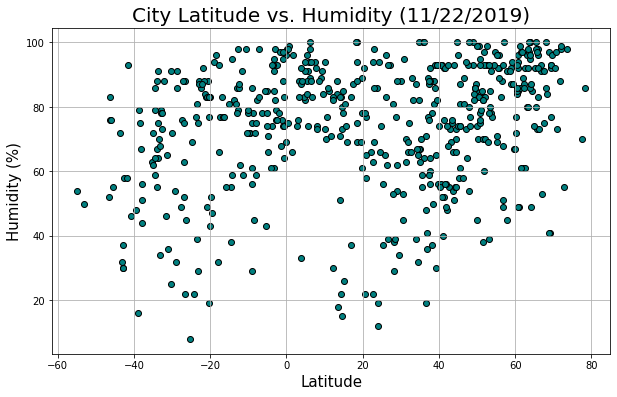

In [129]:
lat_humid = csv_df[['Lat','Humidity']]

#set figure size, for preference
plt.figure(figsize=(10,6))
#create scatter plot
plt.scatter(csv_df['Lat'],csv_df['Humidity'],color='teal',edgecolor='black')

#beautify the plot
plt.title(f'City Latitude vs. Humidity ({current_day})',size=20)
plt.ylabel('Humidity (%)',size=15)
plt.xlabel('Latitude',size=15)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

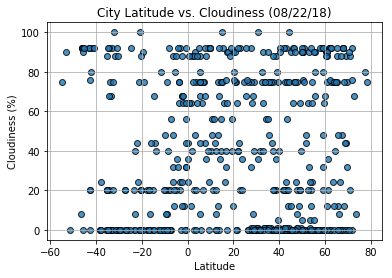

#### Latitude vs. Wind Speed Plot

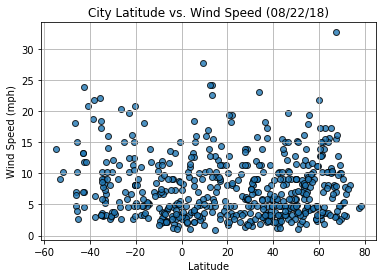